In [44]:
import pandas as pd
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [45]:
import config

#our library to give the passwords

In [46]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=config.client_id, client_secret=config.client_secret))

### Playlist 1

In [47]:
playlist = sp.user_playlist_tracks("MAX", "2LOxEzC4KmoWJ9NhW0kz5M",market="GB")
playlist

{'href': 'https://api.spotify.com/v1/playlists/2LOxEzC4KmoWJ9NhW0kz5M/tracks?offset=0&limit=100&market=GB&additional_types=track',
 'items': [{'added_at': '2017-04-18T02:56:20Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/maxaustralia'},
    'href': 'https://api.spotify.com/v1/users/maxaustralia',
    'id': 'maxaustralia',
    'type': 'user',
    'uri': 'spotify:user:maxaustralia'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1dfeR4HaWDbWqFHLkxsg1d'},
       'href': 'https://api.spotify.com/v1/artists/1dfeR4HaWDbWqFHLkxsg1d',
       'id': '1dfeR4HaWDbWqFHLkxsg1d',
       'name': 'Queen',
       'type': 'artist',
       'uri': 'spotify:artist:1dfeR4HaWDbWqFHLkxsg1d'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/1GbtB4zTqAsyfZEsm1RZfx'},
     'href': 'https://api.spotify.com/v1/albums/1GbtB4zTqAsyfZEsm1RZ

#### How many?

In [48]:
print(list(playlist.keys())) # Let's look at items and total:
print("Total number of songs in the playlist: ",playlist["total"]) #  Let's check items:
len(playlist["items"])

['href', 'items', 'limit', 'next', 'offset', 'previous', 'total']
Total number of songs in the playlist:  992


100

In [49]:

def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [50]:
playlist1 = get_playlist_tracks('MAX', '2LOxEzC4KmoWJ9NhW0kz5M')
playlist1

[{'added_at': '2017-04-18T02:56:20Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/maxaustralia'},
   'href': 'https://api.spotify.com/v1/users/maxaustralia',
   'id': 'maxaustralia',
   'type': 'user',
   'uri': 'spotify:user:maxaustralia'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1dfeR4HaWDbWqFHLkxsg1d'},
      'href': 'https://api.spotify.com/v1/artists/1dfeR4HaWDbWqFHLkxsg1d',
      'id': '1dfeR4HaWDbWqFHLkxsg1d',
      'name': 'Queen',
      'type': 'artist',
      'uri': 'spotify:artist:1dfeR4HaWDbWqFHLkxsg1d'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/1GbtB4zTqAsyfZEsm1RZfx'},
    'href': 'https://api.spotify.com/v1/albums/1GbtB4zTqAsyfZEsm1RZfx',
    'id': '1GbtB4zTqAsyfZEsm1RZfx',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b273e319baafd16e84f0408af2a0',
    

In [51]:
type(playlist1)

list

In [52]:
sp.audio_features(playlist1[0]["track"]["id"])

[{'danceability': 0.414,
  'energy': 0.404,
  'key': 0,
  'loudness': -9.928,
  'mode': 0,
  'speechiness': 0.0499,
  'acousticness': 0.271,
  'instrumentalness': 0,
  'liveness': 0.3,
  'valence': 0.224,
  'tempo': 71.105,
  'type': 'audio_features',
  'id': '4u7EnebtmKWzUH433cf5Qv',
  'uri': 'spotify:track:4u7EnebtmKWzUH433cf5Qv',
  'track_href': 'https://api.spotify.com/v1/tracks/4u7EnebtmKWzUH433cf5Qv',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4u7EnebtmKWzUH433cf5Qv',
  'duration_ms': 354320,
  'time_signature': 4}]

In [53]:
playlist1[0]["track"]["id"]

'4u7EnebtmKWzUH433cf5Qv'

In [54]:
list_of_songs=[]
list_of_singers=[]
list_of_id=[]
for songs in range(0, len(playlist1)):
    song_name = playlist1[songs]['track']['name']
    singer_name = playlist1[songs]['track']['artists'][0]['name']
    song_id = playlist1[songs]['track']['id']
    list_of_songs.append(song_name)
    list_of_singers.append(singer_name)
    list_of_id.append(song_id)
list_of_songs

['Bohemian Rhapsody - Remastered 2011',
 "Sweet Child O' Mine",
 'Smells Like Teen Spirit',
 'Imagine - Remastered 2010',
 "You're the Voice",
 'Stairway to Heaven - Remaster',
 'Purple Rain',
 "It's a Long Way to the Top (If You Wanna Rock 'N' Roll)",
 'Thriller - Single Version',
 "(I Can't Get No) Satisfaction - Mono Version",
 'Dancing Queen',
 "Livin' On A Prayer",
 'Friday On My Mind',
 'Like a Virgin',
 'Good Vibrations - Remastered 2001',
 "Knockin' On Heaven's Door",
 'Hotel California - 2013 Remaster',
 'Careless Whisper',
 "I Still Haven't Found What I'm Looking For",
 'Respect',
 'I Will Always Love You',
 'Somebody That I Used To Know',
 'Smoke On The Water - Remastered 2012',
 'Better Be Home Soon',
 'Light My Fire - 2017 Remaster',
 'Down Under',
 'Wonderwall - Remastered',
 "What's Going On",
 'Khe Sanh - 2011 Remastered',
 'Stayin Alive',
 'Single Ladies (Put a Ring on It)',
 'Wannabe',
 'Superstition',
 "Can't Get You out of My Head",
 'Under the Bridge',
 'You Took T

In [55]:
list_of_songs_df = pd.DataFrame(list_of_songs) 
list_of_songs_df

,0
0,Bohemian Rhapsody - Remastered 2011
1,Sweet Child O' Mine
2,Smells Like Teen Spirit
3,Imagine - Remastered 2010
4,You're the Voice
...,...
987,Running on Empty
988,Every Little Thing She Does Is Magic
989,Doo Wop (That Thing)
990,The Boys Are Back In Town


In [56]:
list_of_songs_df.columns={'track'}

In [57]:
list_of_songs_df

,track
0,Bohemian Rhapsody - Remastered 2011
1,Sweet Child O' Mine
2,Smells Like Teen Spirit
3,Imagine - Remastered 2010
4,You're the Voice
...,...
987,Running on Empty
988,Every Little Thing She Does Is Magic
989,Doo Wop (That Thing)
990,The Boys Are Back In Town


In [58]:
list_of_singers_df =pd.DataFrame(list_of_singers)

In [59]:
list_of_singers_df.columns={'artist'}
list_of_singers_df

,artist
0,Queen
1,Guns N' Roses
2,Nirvana
3,John Lennon
4,John Farnham
...,...
987,Jackson Browne
988,The Police
989,Ms. Lauryn Hill
990,Thin Lizzy


In [60]:
list_of_id_df =pd.DataFrame(list_of_id)

In [61]:
list_of_id_df.columns={'id'}
list_of_id_df

,id
0,4u7EnebtmKWzUH433cf5Qv
1,7o2CTH4ctstm8TNelqjb51
2,4CeeEOM32jQcH3eN9Q2dGj
3,7pKfPomDEeI4TPT6EOYjn9
4,5NwkWwfRJaT55hEPtCmJHx
...,...
987,3UrDYCWfY6fTsiA63NNL27
988,44aTAUBF0g6sMkMNE8I5kd
989,0uEp9E98JB5awlA084uaIg
990,43DeSV93pJPT4lCZaWZ6b1


In [62]:
database1 = pd.concat([list_of_singers_df,list_of_songs_df,list_of_id_df], axis =1)
database1

,artist,track,id
0,Queen,Bohemian Rhapsody - Remastered 2011,4u7EnebtmKWzUH433cf5Qv
1,Guns N' Roses,Sweet Child O' Mine,7o2CTH4ctstm8TNelqjb51
2,Nirvana,Smells Like Teen Spirit,4CeeEOM32jQcH3eN9Q2dGj
3,John Lennon,Imagine - Remastered 2010,7pKfPomDEeI4TPT6EOYjn9
4,John Farnham,You're the Voice,5NwkWwfRJaT55hEPtCmJHx
...,...,...,...
987,Jackson Browne,Running on Empty,3UrDYCWfY6fTsiA63NNL27
988,The Police,Every Little Thing She Does Is Magic,44aTAUBF0g6sMkMNE8I5kd
989,Ms. Lauryn Hill,Doo Wop (That Thing),0uEp9E98JB5awlA084uaIg
990,Thin Lizzy,The Boys Are Back In Town,43DeSV93pJPT4lCZaWZ6b1


In [63]:
song_features=[]
for song in range(0,len(playlist1)):
    song_features.append(sp.audio_features(playlist1[song]['track']['id'])[0])
song_features = pd.DataFrame(song_features)
song_features.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.414,0.404,0,-9.928,0,0.0499,0.271000,0.000000,0.3000,0.224,71.105,audio_features,4u7EnebtmKWzUH433cf5Qv,spotify:track:4u7EnebtmKWzUH433cf5Qv,https://api.spotify.com/v1/tracks/4u7EnebtmKWz...,https://api.spotify.com/v1/audio-analysis/4u7E...,354320,4
1,0.454,0.910,6,-7.766,1,0.0448,0.086600,0.099600,0.1160,0.629,125.116,audio_features,7o2CTH4ctstm8TNelqjb51,spotify:track:7o2CTH4ctstm8TNelqjb51,https://api.spotify.com/v1/tracks/7o2CTH4ctstm...,https://api.spotify.com/v1/audio-analysis/7o2C...,354520,4
2,0.502,0.912,1,-4.556,1,0.0564,0.000025,0.000173,0.1060,0.720,116.761,audio_features,4CeeEOM32jQcH3eN9Q2dGj,spotify:track:4CeeEOM32jQcH3eN9Q2dGj,https://api.spotify.com/v1/tracks/4CeeEOM32jQc...,https://api.spotify.com/v1/audio-analysis/4Cee...,301920,4
3,0.547,0.257,0,-12.358,1,0.0252,0.907000,0.183000,0.0935,0.169,75.752,audio_features,7pKfPomDEeI4TPT6EOYjn9,spotify:track:7pKfPomDEeI4TPT6EOYjn9,https://api.spotify.com/v1/tracks/7pKfPomDEeI4...,https://api.spotify.com/v1/audio-analysis/7pKf...,187867,4
4,0.369,0.762,10,-8.993,1,0.0464,0.220000,0.000028,0.5790,0.644,84.957,audio_features,5NwkWwfRJaT55hEPtCmJHx,spotify:track:5NwkWwfRJaT55hEPtCmJHx,https://api.spotify.com/v1/tracks/5NwkWwfRJaT5...,https://api.spotify.com/v1/audio-analysis/5Nwk...,302107,4


In [64]:
database_df = pd.concat([database1,song_features], axis =1)
database_df. head()

,artist,track,id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Queen,Bohemian Rhapsody - Remastered 2011,4u7EnebtmKWzUH433cf5Qv,0.414,0.404,0,-9.928,0,0.0499,0.271000,...,0.3000,0.224,71.105,audio_features,4u7EnebtmKWzUH433cf5Qv,spotify:track:4u7EnebtmKWzUH433cf5Qv,https://api.spotify.com/v1/tracks/4u7EnebtmKWz...,https://api.spotify.com/v1/audio-analysis/4u7E...,354320,4
1,Guns N' Roses,Sweet Child O' Mine,7o2CTH4ctstm8TNelqjb51,0.454,0.910,6,-7.766,1,0.0448,0.086600,...,0.1160,0.629,125.116,audio_features,7o2CTH4ctstm8TNelqjb51,spotify:track:7o2CTH4ctstm8TNelqjb51,https://api.spotify.com/v1/tracks/7o2CTH4ctstm...,https://api.spotify.com/v1/audio-analysis/7o2C...,354520,4
2,Nirvana,Smells Like Teen Spirit,4CeeEOM32jQcH3eN9Q2dGj,0.502,0.912,1,-4.556,1,0.0564,0.000025,...,0.1060,0.720,116.761,audio_features,4CeeEOM32jQcH3eN9Q2dGj,spotify:track:4CeeEOM32jQcH3eN9Q2dGj,https://api.spotify.com/v1/tracks/4CeeEOM32jQc...,https://api.spotify.com/v1/audio-analysis/4Cee...,301920,4
3,John Lennon,Imagine - Remastered 2010,7pKfPomDEeI4TPT6EOYjn9,0.547,0.257,0,-12.358,1,0.0252,0.907000,...,0.0935,0.169,75.752,audio_features,7pKfPomDEeI4TPT6EOYjn9,spotify:track:7pKfPomDEeI4TPT6EOYjn9,https://api.spotify.com/v1/tracks/7pKfPomDEeI4...,https://api.spotify.com/v1/audio-analysis/7pKf...,187867,4
4,John Farnham,You're the Voice,5NwkWwfRJaT55hEPtCmJHx,0.369,0.762,10,-8.993,1,0.0464,0.220000,...,0.5790,0.644,84.957,audio_features,5NwkWwfRJaT55hEPtCmJHx,spotify:track:5NwkWwfRJaT55hEPtCmJHx,https://api.spotify.com/v1/tracks/5NwkWwfRJaT5...,https://api.spotify.com/v1/audio-analysis/5Nwk...,302107,4


#### Dropping the columns

In [65]:
lists = song_features.columns.to_list()
lists

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature']

In [66]:
song_features.drop(['uri', 'key','time_signature', 'type', 'analysis_url', 'id', 'track_href', 'analysis_url', 'mode','duration_ms'], axis = 1, inplace = True)
song_features

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.414,0.404,-9.928,0.0499,0.271000,0.000000,0.3000,0.224,71.105
1,0.454,0.910,-7.766,0.0448,0.086600,0.099600,0.1160,0.629,125.116
2,0.502,0.912,-4.556,0.0564,0.000025,0.000173,0.1060,0.720,116.761
3,0.547,0.257,-12.358,0.0252,0.907000,0.183000,0.0935,0.169,75.752
4,0.369,0.762,-8.993,0.0464,0.220000,0.000028,0.5790,0.644,84.957
...,...,...,...,...,...,...,...,...,...
987,0.531,0.948,-5.438,0.0568,0.006000,0.011700,0.6940,0.498,136.891
988,0.558,0.768,-9.997,0.0343,0.121000,0.062600,0.1240,0.429,81.909
989,0.535,0.505,-8.926,0.2450,0.039300,0.000000,0.0923,0.495,99.935
990,0.445,0.706,-9.803,0.0461,0.234000,0.000252,0.2050,0.768,80.823


#### Importing libraries

In [67]:
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

#### Scaling

In [68]:
scaler = StandardScaler()
scaler.fit(song_features)
X_scaled = scaler.transform(song_features)
X_scaled_df = pd.DataFrame(X_scaled, columns = song_features.columns)
display(song_features.head())
print()
display(X_scaled_df.head())


#scaler = StandardScaler()
#scaler.fit(X)
#X_scaled = scaler.transform(X)
#X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
#display(X.head())
#print()
#display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.414,0.404,-9.928,0.0499,0.271000,0.000000,0.3000,0.224,71.105
1,0.454,0.910,-7.766,0.0448,0.086600,0.099600,0.1160,0.629,125.116
2,0.502,0.912,-4.556,0.0564,0.000025,0.000173,0.1060,0.720,116.761
3,0.547,0.257,-12.358,0.0252,0.907000,0.183000,0.0935,0.169,75.752
4,0.369,0.762,-8.993,0.0464,0.220000,0.000028,0.5790,0.644,84.957


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-1.187605,-1.478333,-0.545861,-0.156537,0.392523,-0.288313,0.710362,-1.659507,-1.894371
1,-0.929960,1.151985,0.124838,-0.245249,-0.447648,0.446181,-0.416900,0.037715,0.158987
2,-0.620785,1.162381,1.120649,-0.043474,-0.842103,-0.287037,-0.478164,0.419066,-0.158649
3,-0.330933,-2.242476,-1.299699,-0.586179,3.290296,1.061210,-0.554745,-1.889994,-1.717704
4,-1.477457,0.382643,-0.255804,-0.217418,0.160155,-0.288107,2.419635,0.100575,-1.367754


#### Saving my scaler as pickle

In [69]:
import pickle
with open('scaler.pickle', 'wb') as f:
    pickle.dump(scaler, f)

In [70]:
X_scaled_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02,9.920000e+02
mean,-4.536022e-16,-3.186295e-16,-2.341877e-16,-4.224891e-17,1.182969e-16,-1.320628e-17,1.215985e-16,-2.014168e-16,-6.401689e-17
std,1.000504e+00,1.000504e+00,1.000504e+00,1.000504e+00,1.000504e+00,1.000504e+00,1.000504e+00,1.000504e+00,1.000504e+00
min,-2.894508e+00,-2.918250e+00,-4.477608e+00,-6.348833e-01,-8.421977e-01,-2.883132e-01,-1.054049e+00,-2.348453e+00,-2.309065e+00
25%,-6.529904e-01,-7.271847e-01,-5.914636e-01,-4.661576e-01,-7.607765e-01,-2.883132e-01,-6.130990e-01,-7.888950e-01,-6.879933e-01
50%,4.265309e-02,1.201311e-01,1.805227e-01,-3.278721e-01,-4.396750e-01,-2.877940e-01,-4.046474e-01,9.847949e-02,-8.130223e-02
75%,6.738851e-01,8.348913e-01,7.714946e-01,3.741023e-02,3.936624e-01,-2.675173e-01,3.305238e-01,8.601338e-01,5.583309e-01
max,2.509611e+00,1.583440e+00,2.192464e+00,1.482178e+01,3.467990e+00,6.311812e+00,4.925344e+00,1.525403e+00,3.272193e+00


#### Elbow method

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

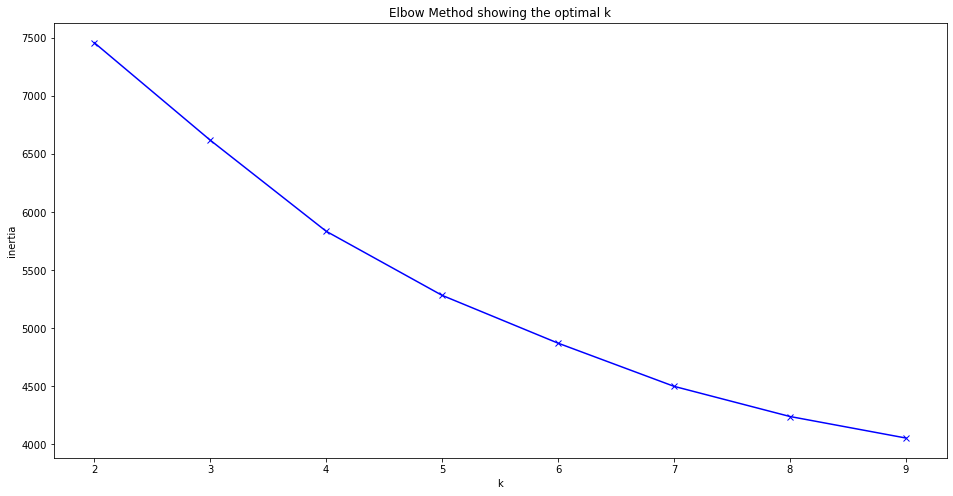

In [71]:
K = range(2, 10)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

#### Silhouette

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

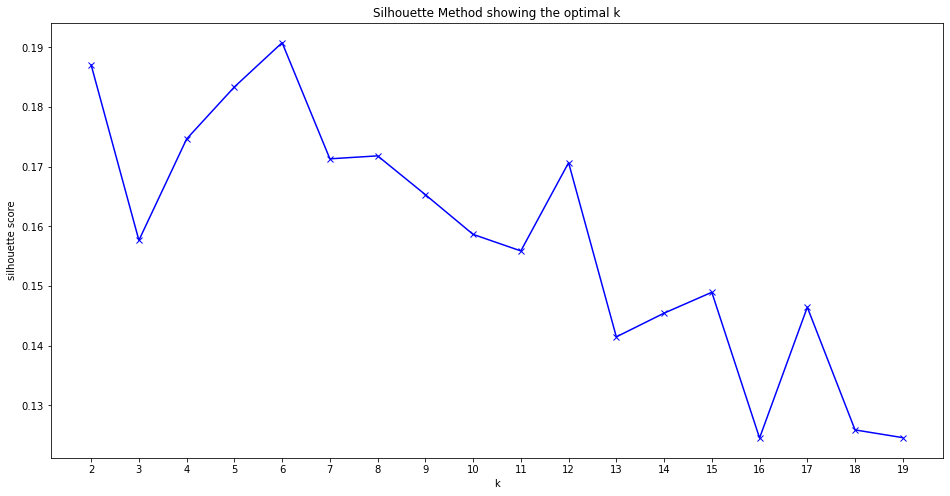

In [72]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
     
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

#### Silhouette Visualizer

In [73]:
#from yellowbrick.cluster import SilhouetteVisualizer
#model = KMeans(3, random_state=42)
#visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
#visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
#visualizer.show()  


#### Clustering

In [74]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=3, random_state=1234)

### pickle for kmeans

In [75]:
with open('kmeans.pickle', 'wb') as f:
    pickle.dump(kmeans, f)

In [76]:
kmeans.labels_

array([2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1, 2, 0,
       1, 2, 1, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 0, 1, 0,
       1, 2, 1, 1, 0, 0, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1, 2, 1, 2, 0, 1, 2,
       2, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 0, 0,
       1, 0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 2,
       0, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 1, 0, 1,
       0, 2, 0, 2, 0, 2, 1, 1, 0, 2, 1, 1, 0, 0, 1, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 1, 2, 0, 2, 1, 2, 1, 0, 1, 2,
       0, 2, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1,
       1, 0, 1, 2, 2, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2,
       2, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 2, 2, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 2,

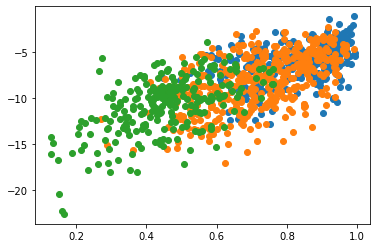

In [77]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(song_features.to_numpy()[row_ix, 1], song_features.to_numpy()[row_ix, 2])
    # show the plot
pyplot.show()

In [78]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    319
1    430
2    243
dtype: int64

In [79]:
song_features["cluster"] = clusters
song_features

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.414,0.404,-9.928,0.0499,0.271000,0.000000,0.3000,0.224,71.105,2
1,0.454,0.910,-7.766,0.0448,0.086600,0.099600,0.1160,0.629,125.116,0
2,0.502,0.912,-4.556,0.0564,0.000025,0.000173,0.1060,0.720,116.761,0
3,0.547,0.257,-12.358,0.0252,0.907000,0.183000,0.0935,0.169,75.752,2
4,0.369,0.762,-8.993,0.0464,0.220000,0.000028,0.5790,0.644,84.957,0
...,...,...,...,...,...,...,...,...,...,...
987,0.531,0.948,-5.438,0.0568,0.006000,0.011700,0.6940,0.498,136.891,0
988,0.558,0.768,-9.997,0.0343,0.121000,0.062600,0.1240,0.429,81.909,1
989,0.535,0.505,-8.926,0.2450,0.039300,0.000000,0.0923,0.495,99.935,1
990,0.445,0.706,-9.803,0.0461,0.234000,0.000252,0.2050,0.768,80.823,1


In [80]:
#### Concatinating the song name etc with features

In [81]:
database_songs = pd.concat([database1,song_features], axis =1)
database_songs

,artist,track,id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,Queen,Bohemian Rhapsody - Remastered 2011,4u7EnebtmKWzUH433cf5Qv,0.414,0.404,-9.928,0.0499,0.271000,0.000000,0.3000,0.224,71.105,2
1,Guns N' Roses,Sweet Child O' Mine,7o2CTH4ctstm8TNelqjb51,0.454,0.910,-7.766,0.0448,0.086600,0.099600,0.1160,0.629,125.116,0
2,Nirvana,Smells Like Teen Spirit,4CeeEOM32jQcH3eN9Q2dGj,0.502,0.912,-4.556,0.0564,0.000025,0.000173,0.1060,0.720,116.761,0
3,John Lennon,Imagine - Remastered 2010,7pKfPomDEeI4TPT6EOYjn9,0.547,0.257,-12.358,0.0252,0.907000,0.183000,0.0935,0.169,75.752,2
4,John Farnham,You're the Voice,5NwkWwfRJaT55hEPtCmJHx,0.369,0.762,-8.993,0.0464,0.220000,0.000028,0.5790,0.644,84.957,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,Jackson Browne,Running on Empty,3UrDYCWfY6fTsiA63NNL27,0.531,0.948,-5.438,0.0568,0.006000,0.011700,0.6940,0.498,136.891,0
988,The Police,Every Little Thing She Does Is Magic,44aTAUBF0g6sMkMNE8I5kd,0.558,0.768,-9.997,0.0343,0.121000,0.062600,0.1240,0.429,81.909,1
989,Ms. Lauryn Hill,Doo Wop (That Thing),0uEp9E98JB5awlA084uaIg,0.535,0.505,-8.926,0.2450,0.039300,0.000000,0.0923,0.495,99.935,1
990,Thin Lizzy,The Boys Are Back In Town,43DeSV93pJPT4lCZaWZ6b1,0.445,0.706,-9.803,0.0461,0.234000,0.000252,0.2050,0.768,80.823,1


#### Saving the Dataframe as csv

In [82]:
database_songs.to_csv('database_songs.csv', index=False)

#### Pickle the Dataframe

In [83]:
with open('database_songs.pickle', 'wb') as f:
    pickle.dump(database_songs, f)

In [84]:
song_features[song_features['cluster'] == 2].sample()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
293,0.36,0.501,-9.129,0.0258,0.0638,0.000093,0.172,0.324,74.807,2


In [85]:
song_features[song_features['cluster'] == 0].sample()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
716,0.46,0.932,-6.264,0.0468,0.139,0.00504,0.101,0.849,203.614,0


In [86]:
song_features[song_features['cluster'] == 1].sample()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
874,0.726,0.698,-4.165,0.0431,0.049,0.0,0.309,0.867,143.994,1


#### Checking the mean of the audio features

In [223]:
song_features[song_features['cluster'] == 0].mean()

danceability          0.712357
energy                0.719608
loudness             -8.181476
speechiness           0.064975
acousticness          0.128188
instrumentalness      0.026044
liveness              0.147552
valence               0.797039
tempo               117.817603
cluster               0.000000
dtype: float64